<a href="https://colab.research.google.com/github/franciscofijamo/marketing_anaytics_01/blob/master/marketing_analytics_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Busniness Case 
O departamento de marketing da empresa Valuu deseja aplicar concenitos de marketing anaçytics, para identificar o resultado das camapanhas de marketing ao longo dos últimos anos. A empresa possui todos registos de vendas, e deseja saber quais os cleintes mais rentaveis, os pricipais segmentos de clientes e realizar previsões de facturamento de modo a definir as estratéfgias de marketing. O ponto crítico para empresa é conhecer o LTV (Life time Value), de modo a direccionar seus esforços de marketing e optimizar a aplicação de recursos corporativos. E para isso foi disponibilizado um banco de dados com as seguintes informações no arquivo compras : **codigo_do_cliente, valor_da_compra e data_da_compra.**

## Como entregar as informações solicitadas pelo departamento de marketing da empresa?

# 1.0 Imports


In [43]:
import pandas                   as pd
import numpy                    as np
import seaborn                  as sns
import matplotlib.pyplot        as plt

from IPython.core.display       import HTML
from IPython.display            import Image
import datetime



# 1.1 Help Functions

In [2]:

# adjust jupyter notebook viz
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [27, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()


Populating the interactive namespace from numpy and matplotlib


# 2.0 Import Data

In [58]:
df = pd.read_csv('compras.txt', header= None, sep='\t', parse_dates=[2])

# 2.1 Data pre-processing

### 2.1.1 Working wit columns

In [ ]:
# rename columns
cols = ['id_client','value','date']
df.columns = cols

In [76]:
# extract year to column year
df['year'] = pd.DatetimeIndex(df['date']).year

In [ ]:
# visualizar os 20 primeiros ordenando por data
df.head(20).sort_values('date')

### 2.1.2 Describe the data

In [ ]:
# describe data (count, mean, std, min, max)
df.describe()

### 2.1.3 Total de Vendas por ano & Vendas medias por ano

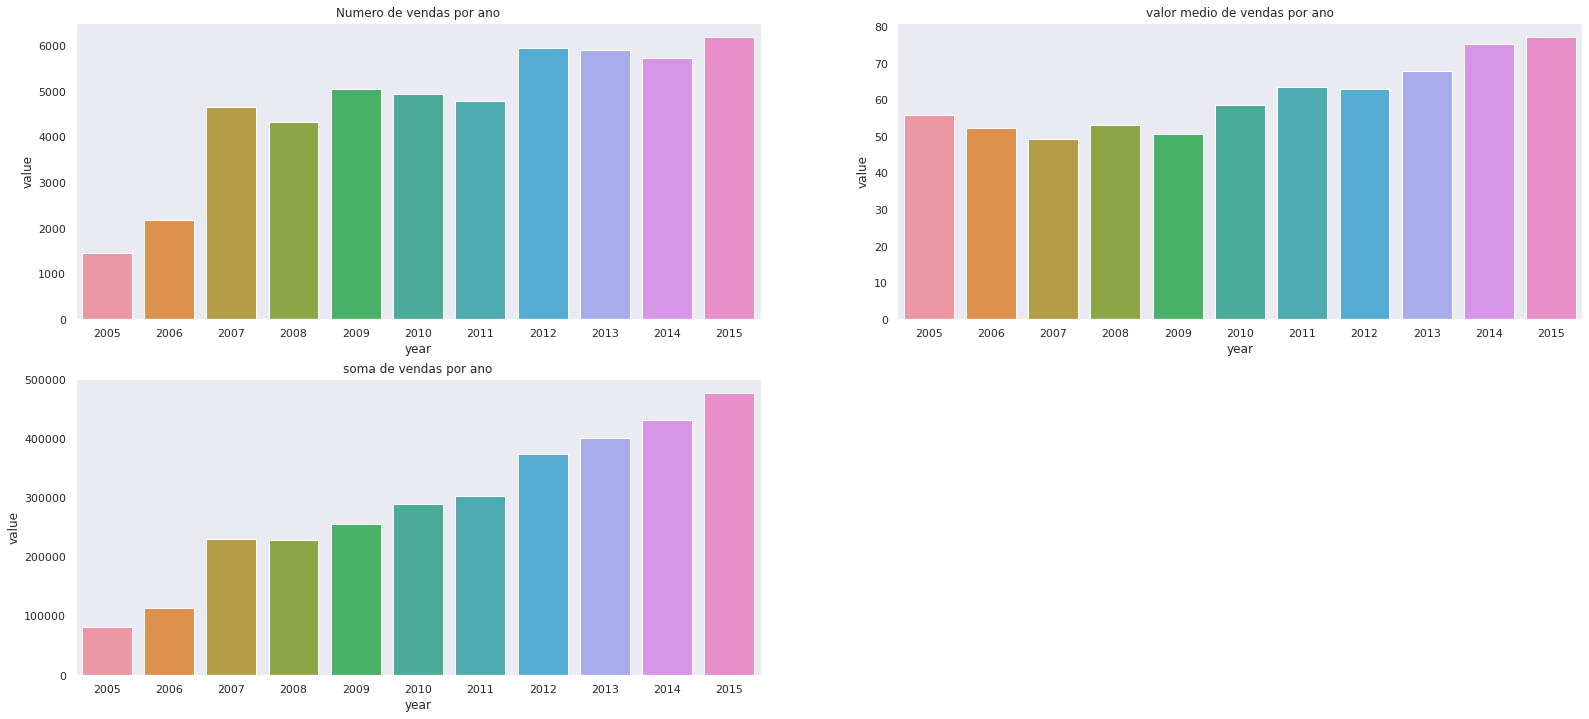

In [158]:
# valor de vendas por ano
sales_for_year = df.groupby('year')\
    .agg({'value': 'count'})\
    .reset_index()

plt.subplot(2,2,1)

sns.barplot(x="year", y="value", data=sales_for_year).set(title = 'Numero de vendas por ano')



# valor medio de vendas por ano
sales_median_year = df.groupby('year')\
    .agg({'value': 'mean'})\
    .reset_index()

plt.subplot(2,2,2)
sns.barplot(x="year", y="value", data=sales_median_year).set(title = 'valor medio de vendas por ano');

# valor medio de vendas por ano
sales_median_year = df.groupby('year')\
    .agg({'value': 'sum'})\
    .reset_index()

plt.subplot(2,2,3)
sns.barplot(x="year", y="value", data=sales_median_year).set(title = 'soma de vendas por ano');




In [157]:
# Agregar tudo em uma tabela
df.groupby('year')\
    .agg({'value': ['count', 'mean', 'sum']})\
    .reset_index()

year value                      
         count       mean        sum
0   2005  1470  55.826122   82064.40
1   2006  2182  52.250454  114010.49
2   2007  4674  49.264014  230260.00
3   2008  4331  53.071780  229853.88
4   2009  5054  50.745253  256466.51
5   2010  4939  58.740012  290116.92
6   2011  4785  63.519300  303939.85
7   2012  5960  62.913312  374963.34
8   2013  5912  67.931357  401610.18
9   2014  5739  75.390347  432665.20
10  2015  6197  77.197697  478394.13